# Explore here

In [1]:
# Your code here
import pandas as pd

logreg_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
logreg_data.head(20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age. Age of customer (numeric)
job. Type of job (categorical)
marital. Marital status (categorical)
education. Level of education (categorical)
default. Do you currently have credit (categorical)
housing. Do you have a housing loan (categorical)
loan. Do you have a personal loan? (categorical)
contact. Type of contact communication (categorical)
month. Last month in which you have been contacted (categorical)
day_of_week. Last day on which you have been contacted (categorical)
duration. Duration of previous contact in seconds (numeric)
campaign. Number of contacts made during this campaign to the customer (numeric)
pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
previous. Number of contacts made during the previous campaign to the customer (numeric)
poutcome. Result of the previous marketing campaign (categorical)
emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
cons.price.idx. Consumer price index. Monthly indicator (numeric)
cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
nr.employed. Number of employees. Quarterly indicator (numeric)
y. TARGET. Whether the customer takes out a long-term deposit or not (categorical)


In [2]:
# Vemos lo que hay en el dataset, sus dimensiones

logreg_data.shape

(41188, 21)

In [3]:
# quiero ver cuantas agrupaciones de dados hay 
formas_de_contacto = logreg_data['poutcome'].unique()
print(formas_de_contacto)

['nonexistent' 'failure' 'success']


Para datapoint listado vemos:
1- previous = numeros de contactos realizados durante la campana anterios. En el 85% de los casos, la presona no fue contactada en la campana anterior.
2- poutcome = solo alrededor del 3% tuvo exito y un 11% fueron fracaso en la campana anterior - el 85% no hubo contacto como ya mencionado

In [4]:
# veo si el poutcome me representa algo en el y
logreg_data.groupby(["previous"]).size().reset_index(name= 'cantidad')

,previous,cantidad
0,0,35563
1,1,4561
2,2,754
3,3,216
4,4,70
5,5,18
6,6,5
7,7,1


In [5]:
logreg_data.groupby(["day_of_week" , "y"]).size().reset_index(name= 'cantidad')
#no se ve relacion con si de ir por el credito, es bastante pareja la distribucion  - lo voy a dropear

,day_of_week,y,cantidad
0,fri,no,6981
1,fri,yes,846
2,mon,no,7667
3,mon,yes,847
4,thu,no,7578
5,thu,yes,1045
6,tue,no,7137
7,tue,yes,953
8,wed,no,7185
9,wed,yes,949


In [6]:
logreg_data.groupby(["month" , "y"]).size().reset_index(name= 'cantidad')
#no se ve relacion con si de ir por el credito, es bastante pareja la distribucion  - lo voy a dropear

,month,y,cantidad
0,apr,no,2093
1,apr,yes,539
2,aug,no,5523
3,aug,yes,655
4,dec,no,93
5,dec,yes,89
6,jul,no,6525
7,jul,yes,649
8,jun,no,4759
9,jun,yes,559


In [7]:
logreg_data.groupby(["campaign" , "y"]).size().reset_index(name= 'cantidad')
# se ve relacion con si de ir por el credito, los que menps contafcto tuvieron 
# dijeron que si en comparacion 

,campaign,y,cantidad
0,1,no,15342
1,1,yes,2300
2,2,no,9359
3,2,yes,1211
4,3,no,4767
5,3,yes,574
6,4,no,2402
7,4,yes,249
8,5,no,1479
9,5,yes,120


In [8]:
logreg_data.groupby(["poutcome" , "previous"]).size().reset_index(name= 'cantidad')
#muestra que menos contacto tiene mas resultado

,poutcome,previous,cantidad
0,failure,1,3696
1,failure,2,434
2,failure,3,88
3,failure,4,30
4,failure,5,3
5,failure,6,1
6,nonexistent,0,35563
7,success,1,865
8,success,2,320
9,success,3,128


In [9]:
logreg_data.groupby(["pdays" , "y"]).size().reset_index(name= 'cantidad')
#lo que mas resultado tuvo fue dejar pasar mas tiempo

,pdays,y,cantidad
0,0,no,5
1,0,yes,10
2,1,no,18
3,1,yes,8
4,2,no,24
5,2,yes,37
6,3,no,141
7,3,yes,298
8,4,no,55
9,4,yes,63


In [10]:
logreg_data.groupby(["y"]).size().reset_index(name= 'cantidad')

,y,cantidad
0,no,36548
1,yes,4640


In [11]:
# Veo que tipo de datos tiene y si hay valores nulos

logreg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En este caso, tenemos 41188 personas en la lista. Hay 21 columnas incluyendo la y, que es la columna de nujestro target a predecir, esto es, si la persona  contratará o no un depósito a largo plazo..
No hay valores nulos en el dataset
El data set tiene  10 caracteristicas numericas y 11 categoricas

In [12]:
# BUSCAR DUPLICADOS
# no hay datos unico a ser filtrado o limpiado.

In [13]:
# ElIMINAR DATOS IRRELEVANTES
# Voy a dropear ==  contact, month, day_of_week, duration, campaign, pdays, previous

logreg_data.drop(["duration",  "month" , "day_of_week"], axis = 1, inplace = True)

logreg_data.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


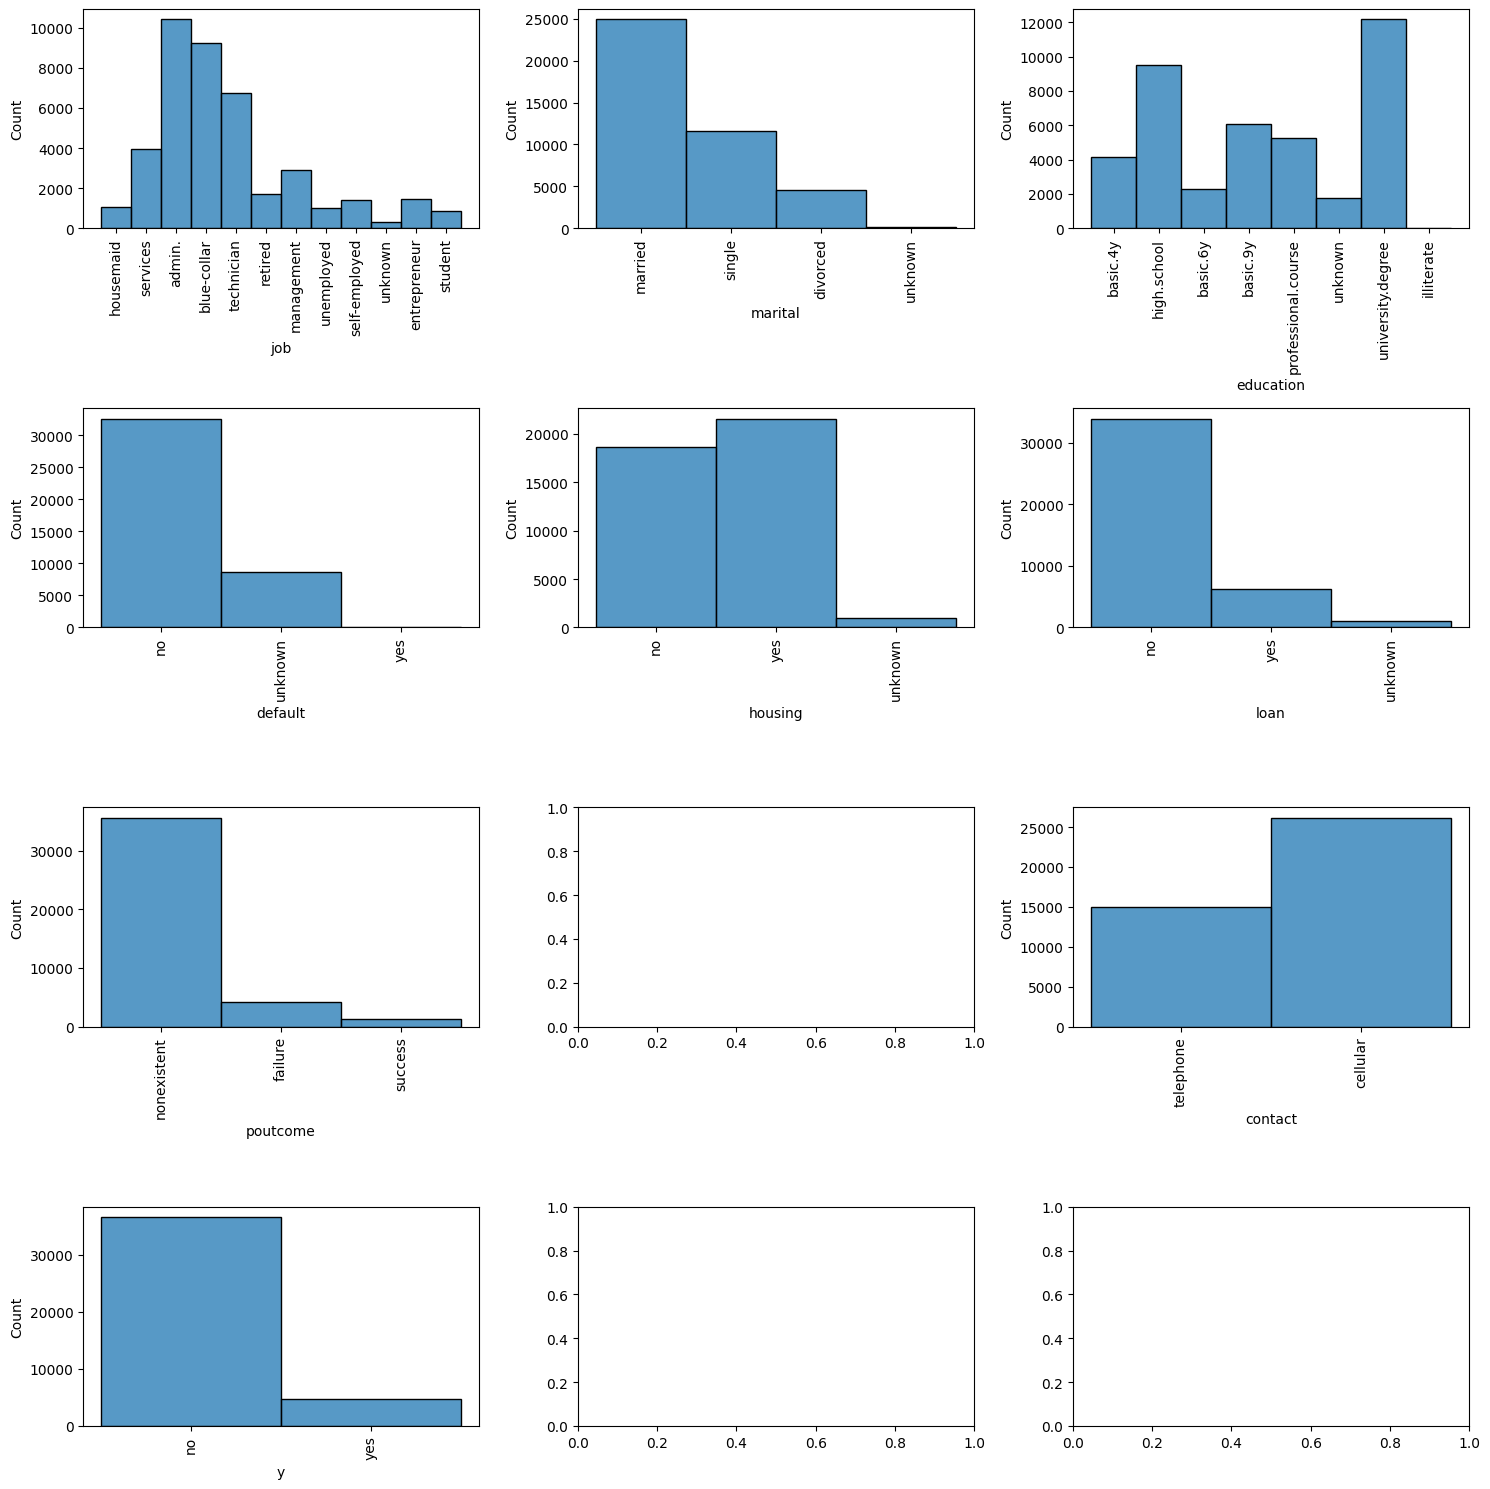

In [14]:
# Step 3: Analysis of univariate variables
# ahora hago histogramas de las varialbes categofrica - roto la blabla del eje x porque no se puede leer sino


import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize = (15,15))
sns.histplot(ax = axis[0, 0], data = logreg_data, x = "job")
axis[0, 0].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[0, 1], data = logreg_data, x = "marital")
axis[0, 1].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[0, 2], data = logreg_data, x = "education")
axis[0, 2].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[1, 0], data = logreg_data, x = "default")
axis[1, 0].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[1, 1], data = logreg_data, x = "housing")
axis[1, 1].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[1, 2], data = logreg_data, x = "loan")
axis[1, 2].tick_params(axis='x', rotation=90)
sns.histplot(ax = axis[2, 0], data = logreg_data, x = "poutcome")
axis[2, 0].tick_params(axis='x', rotation=90)



sns.histplot(ax = axis[2, 2], data = logreg_data, x = "contact")
axis[2, 2].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[3, 0], data = logreg_data, x = "y")
axis[3, 0].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


De los histogramas vemos que
1- MAs del 50% de las personas trabajan en admin, bluec ollar ? y technicos
2- MAs del 60% de las personas de la base son casadas, un 24% es soltera, un 12% son divorciados y una infima parte no se sabe 
3- Casi un 30% de las personas tiene un titulo universitario, mientras que poco mas del 24% tiene un titulo secundario. Alrededor de 24% posee un curso profesional o educacion basica de 9 anos y el resto tiene educacion bacica de 4 o 6 anos, manos de un 5% no se sabe el nivel educativo y una infima parte carece de educacion 
4- Con referencia a tener creditos actualmente, podemos ver que casi un 80% no tiene y del resto no tenemos informacion.
5- Al analizar los tomadores de prestamos de vivienda, vemos que poco mas del 50% si tiene un prestamo tomado, mientras que casi el 50% no tiene prestamo. De un numero bajo de personas no tenemos data 
6- Pasando a prestamos personales, podemos ver que alrededor de un 83% no tiene este tipo de prestamo tomado, mientras que un 12% de las personas tiene actualmente un prestamo personal.
7- Con referencia a la forma de contacto, ambas telefonicas, el contacto a traves de telefono celular ha sucedido en 60% de los casos, el resto por telefono de linea
8- Al mirar el ultia dia en que se ha contactado a la persona, vemos que es un dato casi simetrico
9- Si miramos el resultado de la capana de marketing anterior, vemos que en aproximadamente un 85% de los casos, no hubo resultado, entendemos, porque no hubo contacto.  Solo alrededor del 3% tuvo exito y un 11% fueron un fracaso en la campana anterior


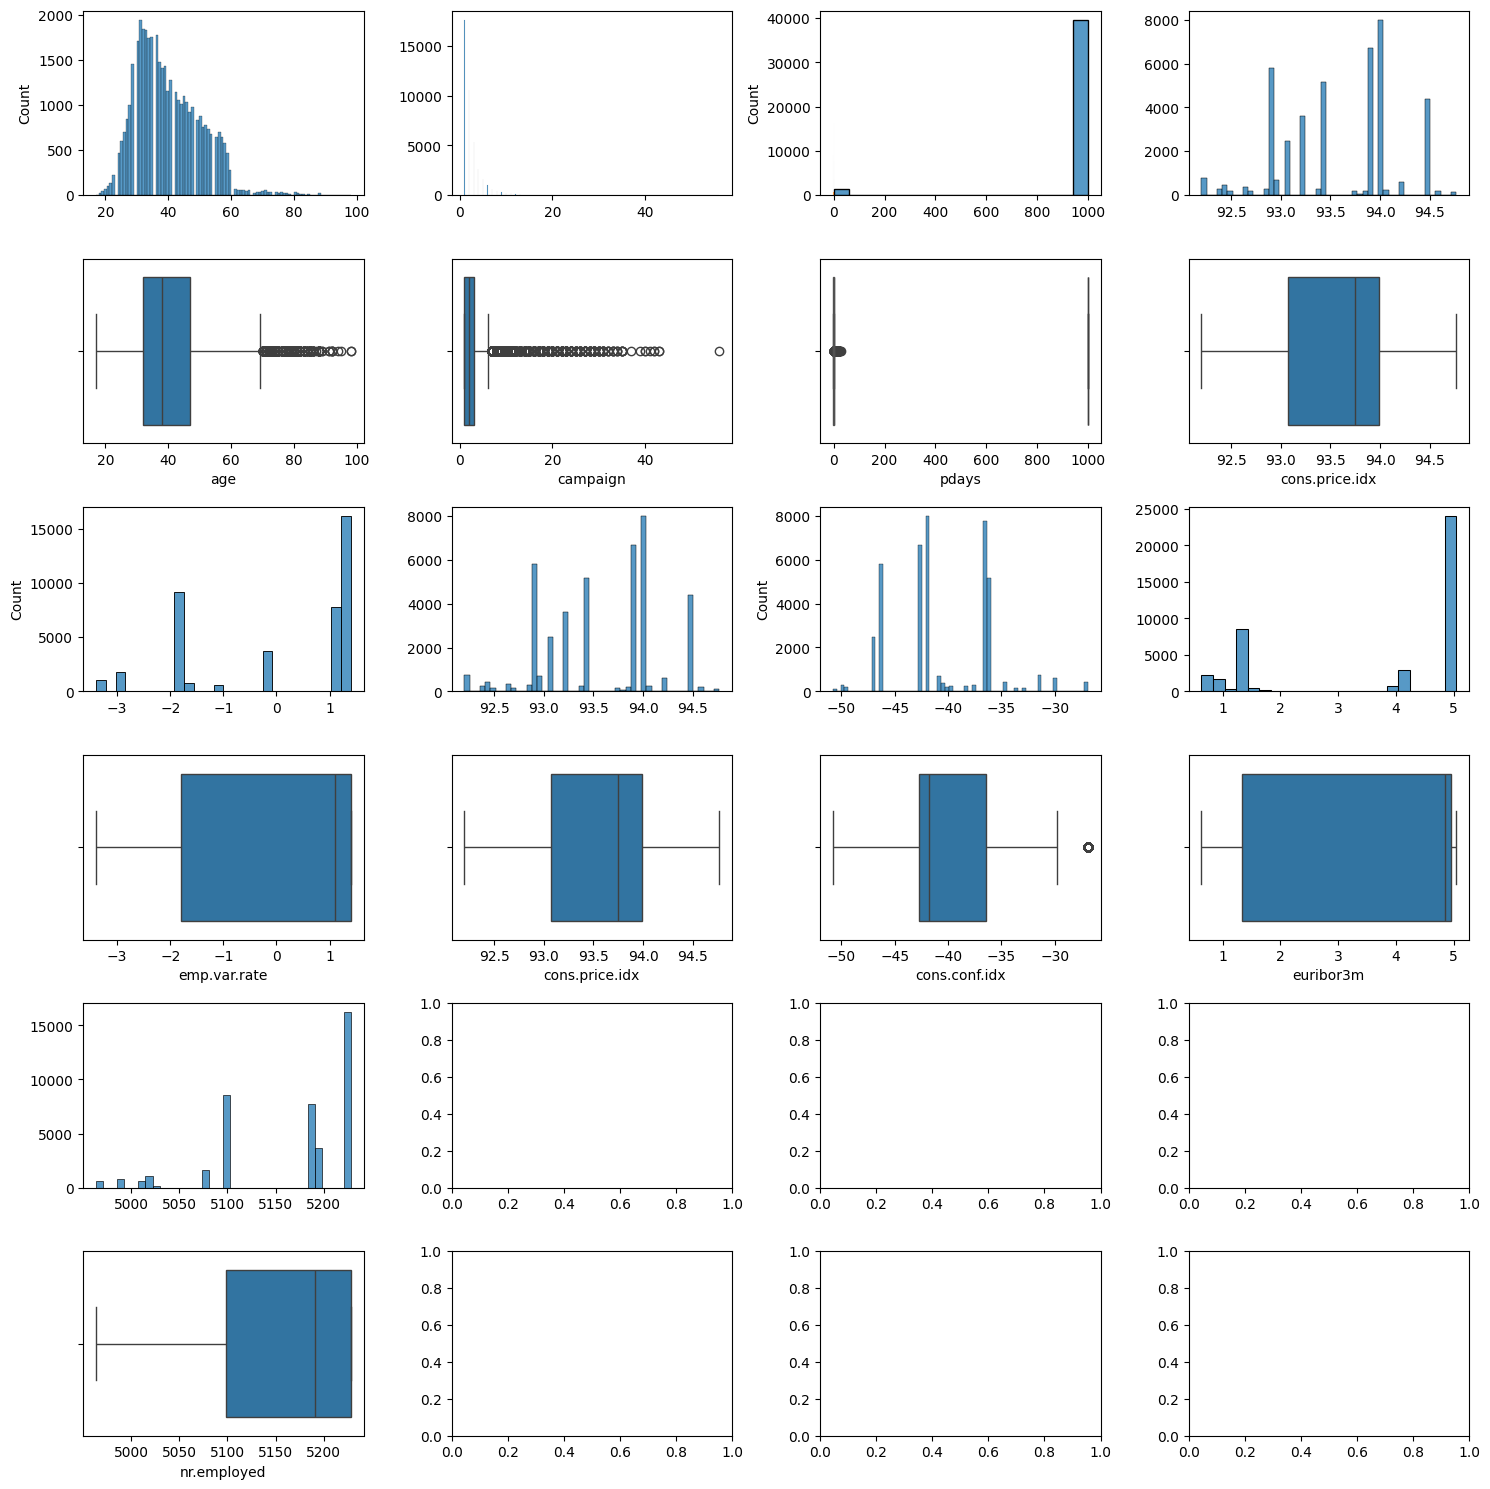

In [15]:
# Analysis on numeric variables

fig, axis = plt.subplots(6, 4, figsize = (15, 15))
# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = logreg_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = logreg_data, x = "age")
sns.histplot(ax = axis[0, 1], data = logreg_data, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = logreg_data, x = "campaign")

sns.histplot(ax = axis[0, 2], data = logreg_data, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = logreg_data, x = "pdays")

sns.histplot(ax = axis[0, 2], data = logreg_data, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = logreg_data, x = "emp.var.rate")
sns.histplot(ax = axis[0, 3], data = logreg_data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = logreg_data, x = "cons.price.idx")


sns.histplot(ax = axis[2, 0], data = logreg_data, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = logreg_data, x = "emp.var.rate")
sns.histplot(ax = axis[2, 1], data = logreg_data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = logreg_data, x = "cons.price.idx")


sns.histplot(ax = axis[2, 2], data = logreg_data, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = logreg_data, x = "cons.conf.idx")
sns.histplot(ax = axis[2, 3], data = logreg_data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = logreg_data, x = "euribor3m")

sns.histplot(ax = axis[4, 0], data = logreg_data, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = logreg_data, x = "nr.employed")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Podemos ver outliers en la edad, numero de contactos realizados en esta campana, numero de dias que transcurriero desde la ultima campana hasta contactado.  Veremos mas adelante que hacer con esos datos

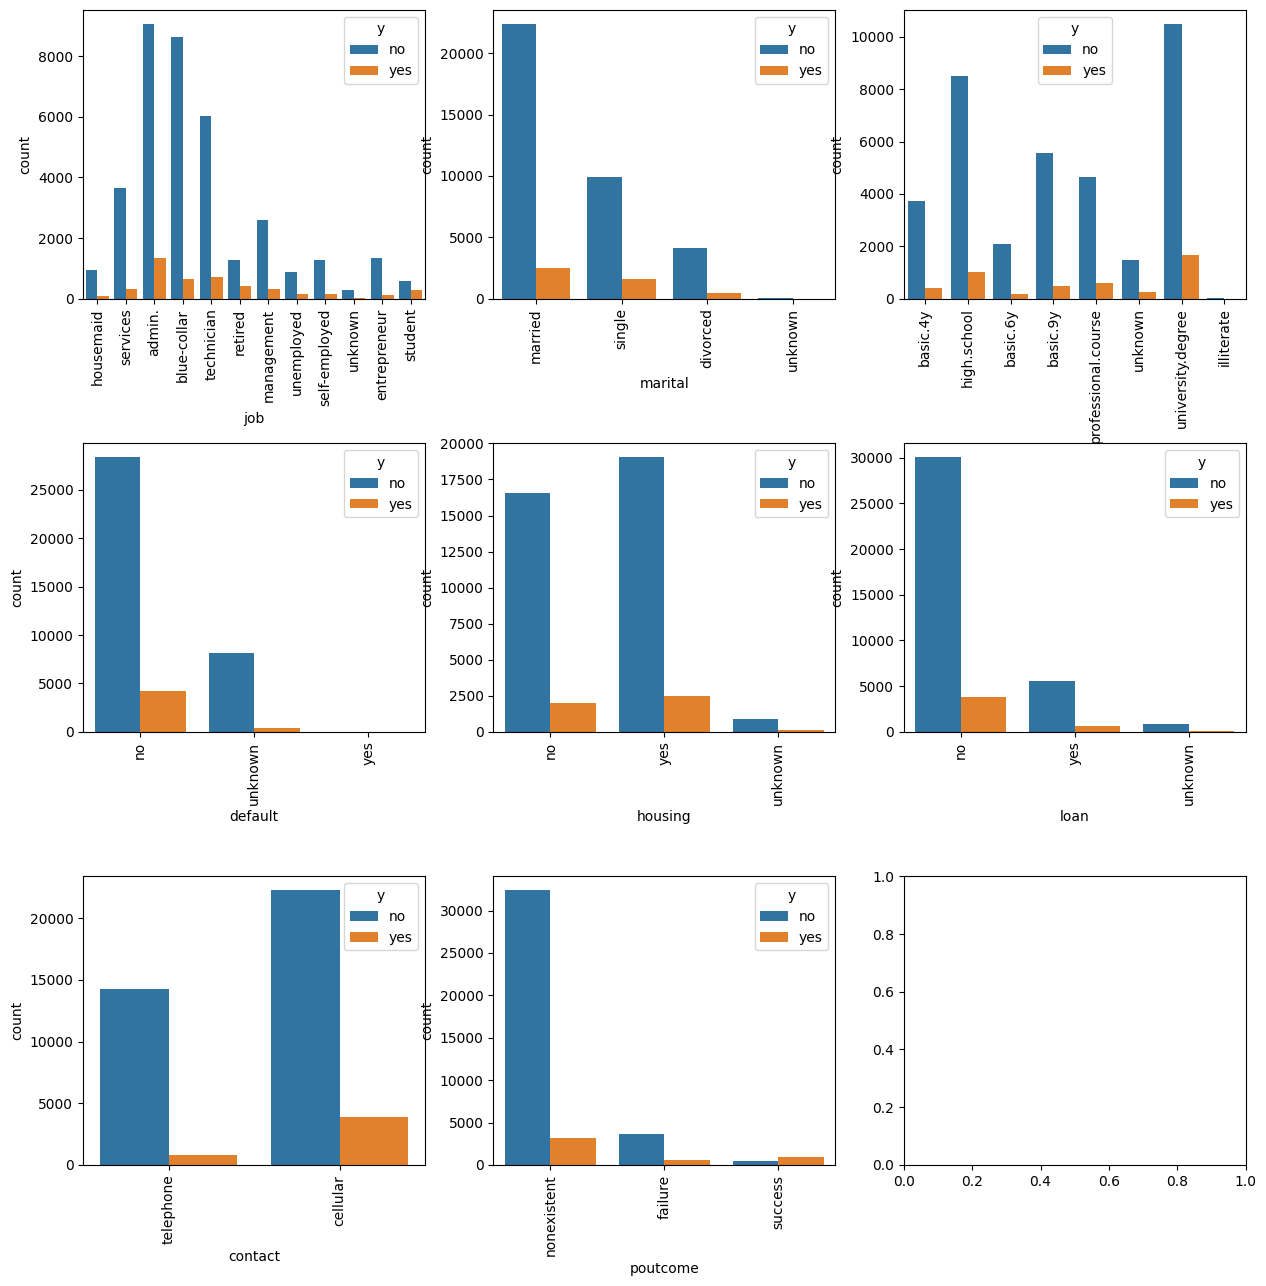

In [16]:
#Voy a hacer analisis categorico categorico para vr como se relacionan con que al persona vaya. o no a djear el deposito



fig, axis = plt.subplots(3, 3, figsize = (15, 15))
sns.countplot(ax = axis[0,0], data = logreg_data, x = "job", hue="y")
axis[0, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[0,1], data = logreg_data, x = 'marital', hue="y")
axis[0, 1].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[0,2], data = logreg_data, x = 'education', hue="y")
axis[0, 2].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[1,0], data = logreg_data, x = 'default', hue="y")
axis[1, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[1,1], data = logreg_data, x = 'housing', hue="y")
axis[1, 1].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[1,2], data = logreg_data, x = 'loan', hue="y")
axis[1, 2].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[2,0], data = logreg_data, x = 'contact', hue="y")
axis[2, 0].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[2,1], data = logreg_data, x = 'poutcome', hue="y")
axis[2, 1].tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

Aqui hemos comparado datos categoricos contra categoricos, en el caso, si la pesona ha tomado o no un credito a largo plazo versus de que trabaja, su estado civil, el nivel educativo, si tiene algun credito actualmente, si tiene prestamo hipotecario, si tiene prestamo presonal, como lo han contactado y resultado de la campana de marketing anterior.
La campana anterior tiene alrededor del 85% de personas con resultado no existente, queire decir, no han participado de la campana
LAs personas de la actual camapana han tomado credito a largo plazo solo en el 11% de los casos, siendo el resto no tomadores de este serivcio.
No se ve ninguna relacion fuerte o significativa entre los datapoints categoricos.

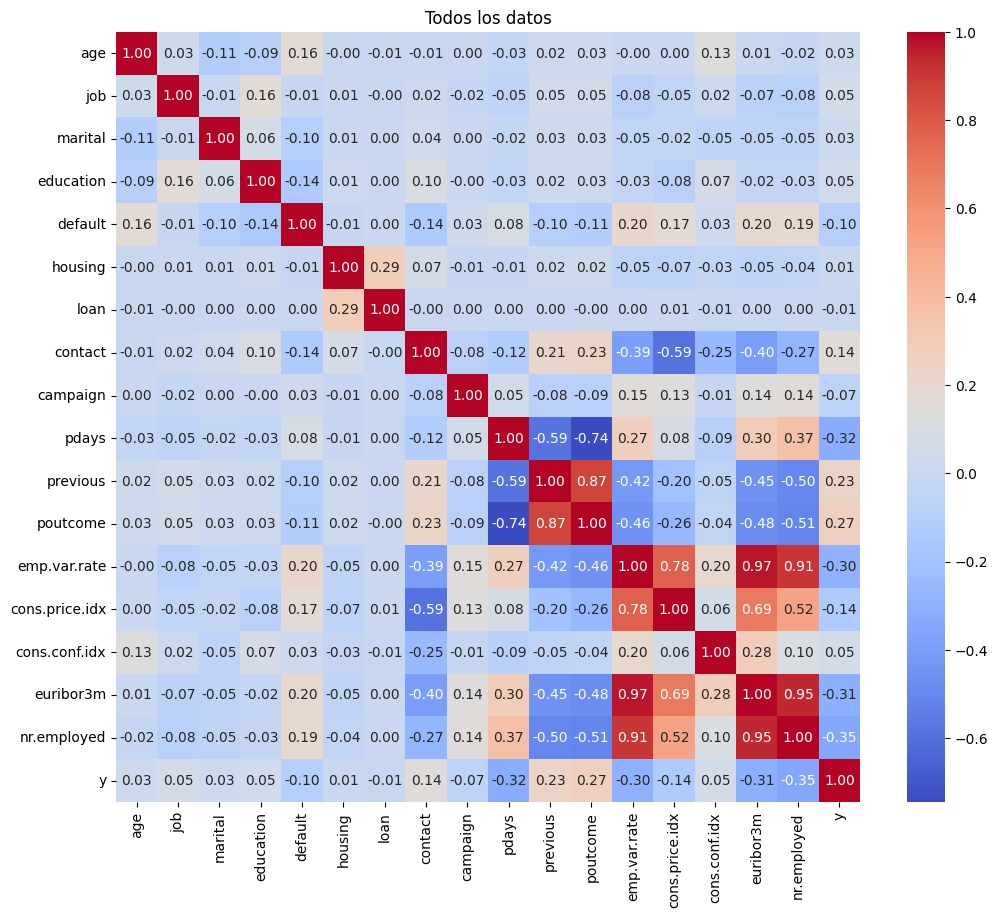

In [17]:
# Numerical-categorical analysis (complete
# Convierto la variable categorica en valores numéricos únicos. marital education default housing loan contact poutcome y

logreg_data["job"] = pd.factorize(logreg_data["job"])[0]
logreg_data["marital"] = pd.factorize(logreg_data["marital"])[0]
logreg_data["education"] = pd.factorize(logreg_data["education"])[0]
logreg_data["default"] = pd.factorize(logreg_data["default"])[0]
logreg_data["housing"] = pd.factorize(logreg_data["housing"])[0]
logreg_data["loan"] = pd.factorize(logreg_data["loan"])[0]
logreg_data["contact"] = pd.factorize(logreg_data["contact"])[0]
logreg_data["poutcome"] = pd.factorize(logreg_data["poutcome"])[0]
logreg_data["y"] = pd.factorize(logreg_data["y"])[0]


corr_matrix = logreg_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Todos los datos')
plt.show()


#logreg_data_numeric = logreg_data.copy()

# Factorizar todas las columnas categóricas (de tipo object)
#categorical_columns = logreg_data_numeric.select_dtypes(include=['object']).columns
#for col in categorical_columns:
    #logreg_data_numeric[col] = pd.factorize(logreg_data_numeric[col])[0]


La relacion entre los datos siendo todos numeros:
En general, no hay ninguna correlacion fuerte entre los datos. Las relacions que sobresalen o mas correlacion tienen son los indicadores de performance economicos o variables relativas a la economia del pais o EU. 
El indice de precios del consumidor la ttasa de variacion del empleo, el indice de confianza del consumidor y el EURibor estan relacionados entre si. Mas empleo puede significar una fuba de precio (espiral salario - precio), el imndice de confianza del consumidor tambien se leraicon de esa maner con el ratio de variacionh del empleo.  El EURIBOR puede verse afectado por la expectativa de inflacion y asi. Si la inflacion sube, la gente disminuye su confianza como consumidora (el valor del dinero se pierde - soy de argentina, lo veo clarisimo). Un mercado laboral furerte puede llevar a aumenatr las tasas de interes para ocntrola la inflacion, lo que llevaria a elevar el EURIBOR.
Con referencia. asi la persona ha tomado o no un servicio de credito a largo plazo, podemos ver que relaciona con el otucome de la campana anterior de alguna manera (no es una manera fuerte)


In [18]:
#OUTLIER ANALUSS

logreg_data.describe()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.567593,962.475454,0.172963,0.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [19]:
# AGE

age_stats = logreg_data["age"].describe()
age_stats

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [20]:
#RANGO INTERQ
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"The upper and lower limits to consider outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)} with and interquartile ragne of {round(age_iqr, 2)}")

The upper and lower limits to consider outliers are 69.5 and 9.5 with and interquartile ragne of 15.0


In [21]:
#veo cuantas personas tengo por encima, veo un MAX de 98 en el dataset y se ven varios outliers en el boxplot

logreg_data[logreg_data["age"] > 70]


,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27757,76,5,0,6,0,0,1,1,9,999,0,0,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73,5,0,6,0,1,0,1,1,999,1,1,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88,5,2,0,0,1,0,1,1,999,0,0,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88,5,2,0,0,0,0,1,2,999,0,0,-1.8,92.843,-50.0,1.663,5099.1,1
27805,88,5,2,0,0,1,1,1,5,999,0,0,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,5,2,0,1,1,1,1,4,3,1,2,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81,5,0,0,0,1,0,1,1,999,2,1,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,5,0,4,0,1,0,1,1,999,1,1,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,5,0,4,0,1,0,1,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


Los outliers de la edad son 422, poco mas del 1% del total de datos, asi que dejo estos ouliers



In [22]:
# ANALIZO CAMPAIGN -- numero de contafctos realizados durante esta campana, que tambien muestgra outliers


campaign_stats = logreg_data["campaign"].describe()
campaign_stats


count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [23]:
#RANGO INTERQ
campaign_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_stats["25%"] - 1.5 * campaign_iqr

print(f"The upper and lower limits to consider outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)} with and interquartile ragne of {round(age_iqr, 2)}")

The upper and lower limits to consider outliers are 6.0 and -2.0 with and interquartile ragne of 15.0


In [24]:
#CUENTO CUANTOS SON POR FUERA DE LOS LIMITS
#ME REPRESENTA UN CASI 6% ASI QUE LO VOY A DROPEAR

logreg_data[logreg_data["campaign"] > 6]

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,2,0,6,0,0,0,0,7,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0
1043,41,4,1,6,1,0,0,0,8,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0
1094,40,4,0,4,0,1,0,0,8,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0
1097,51,3,0,0,1,1,0,0,7,999,0,0,1.1,93.994,-36.4,4.856,5191.0,0
1230,48,3,2,0,0,0,0,0,7,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,5,0,3,0,0,0,0,9,999,1,1,-1.1,94.199,-37.5,0.883,4963.6,0
40631,88,5,0,0,0,1,0,1,7,999,0,0,-1.1,94.199,-37.5,0.882,4963.6,0
40698,29,4,1,4,0,1,0,1,7,3,5,2,-1.1,94.199,-37.5,0.879,4963.6,0
40821,33,4,1,4,0,1,0,1,9,999,2,1,-1.1,94.199,-37.5,0.879,4963.6,0


In [25]:
#DROPEO LOS OUTLIERS DE NUMERO DE CONTACTOS

logreg_data = logreg_data[logreg_data["campaign"] <= 6]

In [26]:
#ANALIZO PDAYS Número de días que transcurrieron desde la última campaña hasta que fue contactado

pdays_stats = logreg_data["pdays"].describe()
pdays_stats

count    38782.000000
mean       960.644577
std        191.355554
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [27]:
#CALCULO RANGO IQ
pdays_iqr = pdays_stats["75%"] - pdays_stats["25%"]
upper_limit = pdays_stats["75%"] + 1.5 * pdays_iqr
lower_limit = pdays_stats["25%"] - 1.5 * pdays_iqr

print(f"The upper and lower limits to consider outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)} with and interquartile ragne of {round(age_iqr, 2)}")

The upper and lower limits to consider outliers are 999.0 and 999.0 with and interquartile ragne of 15.0


In [28]:
logreg_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No. hay data nula o faltante


FEATURE SCALING
Before we must conveniently divide the set into train and test, which will prevent the training data from being contaminated by the test set data.
The scaler will be in charge of scaling the variables according to the training set.



In [29]:
from sklearn.model_selection import train_test_split

#armo el grupo de variables a escalar
# age	job	marital	education	default	housing	loan	contact	campaign	pdays	previous	poutcome	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	y

num_variables = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"  ]

#DIVIDO EL SET

X = logreg_data.drop("y", axis = 1)[num_variables]
y = logreg_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39335,37,3,0,3,0,1,0,1,1,999,1,1,-1.8,93.369,-34.8,0.637,5008.7
14817,29,2,1,6,0,1,0,1,1,999,0,0,1.4,93.918,-42.7,4.957,5228.1
10696,37,1,2,1,0,1,0,0,4,999,0,0,1.4,94.465,-41.8,4.961,5228.1
27219,31,2,1,6,0,1,0,0,1,999,0,0,-0.1,93.200,-42.0,4.021,5195.8
28056,30,2,0,6,0,0,1,1,1,999,0,0,-1.8,93.075,-47.1,1.483,5099.1


In [30]:
#Normalizo con Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()


,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39335,-0.289964,-0.275761,-0.735835,-0.120073,-0.508297,0.794207,-0.438572,0.746489,-0.816469,0.200323,1.629012,1.767805,-1.158731,-0.332364,1.222394,-1.680684,-2.147371
14817,-1.054097,-0.681755,0.699878,1.252709,-0.508297,0.794207,-0.438572,0.746489,-0.816469,0.200323,-0.358330,-0.382265,0.863944,0.613505,-0.466396,0.792216,0.867574
10696,-0.289964,-1.087748,2.135591,-1.035262,-0.508297,0.794207,-0.438572,-1.339605,1.526170,0.200323,-0.358330,-0.382265,0.863944,1.555929,-0.274002,0.794506,0.867574
27219,-0.863064,-0.681755,0.699878,1.252709,-0.508297,0.794207,-0.438572,-1.339605,-0.816469,0.200323,-0.358330,-0.382265,-0.084185,-0.623533,-0.316756,0.256421,0.423715
28056,-0.958580,-0.681755,-0.735835,1.252709,-0.508297,-1.056914,1.762448,0.746489,-0.816469,0.200323,-0.358330,-0.382265,-1.158731,-0.838895,-1.406988,-1.196407,-0.905115


In [31]:
#SELECCIONO FEATURES - QUE TENGO MIL Y NO VA

from sklearn.feature_selection import f_classif, SelectKBest

select_model = SelectKBest(f_classif, k = 5)
select_model.fit(X_train_norm, y_train)
ix = select_model.get_support()

X_train_sel = pd.DataFrame(select_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(select_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()


,pdays,poutcome,emp.var.rate,euribor3m,nr.employed
0,999.0,1.0,-1.8,0.637,5008.7
1,999.0,0.0,1.4,4.957,5228.1
2,999.0,0.0,1.4,4.961,5228.1
3,999.0,0.0,-0.1,4.021,5195.8
4,999.0,0.0,-1.8,1.483,5099.1


In [32]:
X_test_sel.head()

,pdays,poutcome,emp.var.rate,euribor3m,nr.employed
0,999.0,0.0,1.4,4.960,5228.1
1,999.0,0.0,-0.2,3.428,5176.3
2,999.0,0.0,-0.1,4.191,5195.8
3,999.0,0.0,-2.9,1.260,5076.2
4,999.0,1.0,-1.8,1.405,5099.1


In [33]:
#GUARDO LOS SETS DE DATOS y asigno columna y a los X sets

X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train_banco.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test_banco.csv", index=False)

In [34]:
# BUENO - APLICAR MODELO DE REGRESION LOGISTICA

train_data = pd.read_csv("../data/processed/clean_train_banco.csv")
test_data = pd.read_csv("../data/processed/clean_test_banco.csv")

train_data.head()


,pdays,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,999.0,1.0,-1.8,0.637,5008.7,0
1,999.0,0.0,1.4,4.957,5228.1,0
2,999.0,0.0,1.4,4.961,5228.1,0
3,999.0,0.0,-0.1,4.021,5195.8,0
4,999.0,0.0,-1.8,1.483,5099.1,0


In [35]:
#AHORA SEPARO LA DROPEO LA COLUMNA Y DE MIS XS --
# CREO NUEVAMENTE EL GRUPO y_train y test con esta columna

X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]


In [37]:
#INICIO Y TREINO O MODELO

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

SOLO HAGO ESTO UNA VEZ? ESTO ES EL TRAINING? CORRER UNA VEZ EL CODE? 
ME DICE QUE ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


In [38]:
#MODEL PREDICTION

#UNA VEZ ENTRENADO, PUEOD USARLO PARA PREDECIR CON EL TEST DATA SET


y_pred = model.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# TEST DE ACCURACY 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8984143354389583

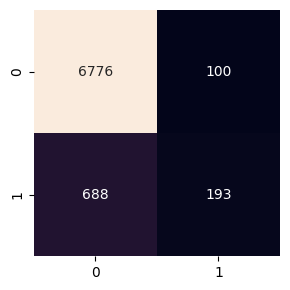

La precision del modelo es 0.658703071672355
El accuracy del modelo es 0.8984143354389583
La sensibilidad del modelo?? falta que se ponga sensible el modelo 0.21906923950056753
el F1 score es 0.3287904599659284


In [40]:
#MATRIX DE CONFUSION

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


banco_cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#DIBUJO lA MATRIZ

cm_df = pd.DataFrame(banco_cm)
plt.figure(figsize= (3,3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()


print("La precision del modelo es", precision)
print("El accuracy del modelo es", accuracy)
print("La sensibilidad del modelo?? falta que se ponga sensible el modelo", recall)
print("el F1 score es", f1)

Recall (Recuperación o Sensibilidad): es la proporción de instancias positivas correctamente clasificadas en relación con todas las instancias que realmente son positivas

El accuracy del modelo es bueno, pero el nivel de sensibilidad es bajo, por lo cual el modelo tiene dificultad para identiicar las instancias? positivas

#OPTIMIZAR EL MODELO PREVIO
#Normally, we do not know the optimal values for the hyperparameters that would generate the best model results. Therefore, it is a vital and important step to include this in any Machine Learning model building process.
#1. Grid search
#The grid search is a method that performs an exhaustive search through a specific (manually set) subset of values and then tries all possible combinations until the best of the models is found.



In [42]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [45]:


grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}
siempre debemos utilizar el conjunto de datos de entrenamiento para ajustarlo. Ahora solo tenemos que repetir el entrenamiento estableciendo estos parámetros en el modelo

In [48]:
model_grid = LogisticRegression(penalty= None, C = 0.001, solver= "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_precision = precision_score(y_test, y_pred)
grid_recall = recall_score(y_test, y_pred)
grid_f1 = f1_score(y_test, y_pred)

print("La precision del modelo es", grid_precision)
print("El accuracy del modelo es", grid_accuracy)
print("La sensibilidad del modelo?? falta que se ponga sensible el modelo", grid_recall)
print("el F1 score es", grid_f1)

La precision del modelo es 0.6758893280632411
El accuracy del modelo es 0.8978986721670749
La sensibilidad del modelo?? falta que se ponga sensible el modelo 0.19409761634506242
el F1 score es 0.30158730158730157


Como los resultados de performance no han mejorado, probaré con Randomized SEarcj


In [49]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [50]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.

Mejores hiperparámetros: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.00026366508987303583}


Mejores hiperparámetros: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.00026366508987303583}
vamos a alicar y a reentrenar el modelo segun estos datos



In [51]:
model_random_search = LogisticRegression(penalty = "l2", C = 0.00026366508987303583, solver = "newton-cg")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

rs_accuracy = accuracy_score(y_test, y_pred)
rs_precision = precision_score(y_test, y_pred)
rs_recall = recall_score(y_test, y_pred)
rs_f1 = f1_score(y_test, y_pred)

print("La precision del modelo es", rs_precision)
print("El accuracy del modelo es", rs_accuracy)
print("La sensibilidad del modelo?? falta que se ponga sensible el modelo", rs_recall)
print("el F1 score es", rs_f1)



La precision del modelo es 0.6812749003984063
El accuracy del modelo es 0.8981565038030166
La sensibilidad del modelo?? falta que se ponga sensible el modelo 0.19409761634506242
el F1 score es 0.30212014134275617


In [52]:
#GURADO este modelo ultimo 

from pickle import dump

dump(model_random_search, open("../models/logistic_regression_C-0.1_penalty-l2_solver-newton-cg.sav", "wb"))